In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from Visualisation import Image_reconstructor, plot_image
from utils import inspect_label, cross_validation, train_test_split
from Kernels import RBF, Chi2Kernel, Chi2_prod_Gaussian, Chi2_sum_Gaussian
from utils import create_Submissioncsv
from tqdm import tqdm
import random
from features_extractor_HOG import get_hog_feature
from features_extractor_SIFT import SIFT
from SVM_All_Version import Multi_Class_SVM_Classifier_OvO
from SVM_multiple_features import Ensemble_SVM_Classifier_OvA


## Visualisation of the data

In [48]:
test_set= np.array(pd.read_csv('C:/Users/frank/Downloads/Challenge Kernel method/Xte.csv',header=None,sep=',',usecols=range(3072)))
train_set = np.array(pd.read_csv('C:/Users/frank/Downloads/Challenge Kernel method/Xtr.csv',header=None,sep=',',usecols=range(3072)))
train_label = np.array(pd.read_csv('C:/Users/frank/Downloads/Challenge Kernel method/Ytr.csv',sep=',',usecols=[1])).squeeze()

In [49]:
print(f'test set size: {test_set.shape}')
print(f'train set size: {train_set.shape}')
print(f'train set labet size: {train_label.shape}')

test set size: (2000, 3072)
train set size: (5000, 3072)
train set labet size: (5000,)


In [50]:
train_set = Image_reconstructor(train_set)
test_set = Image_reconstructor(test_set)


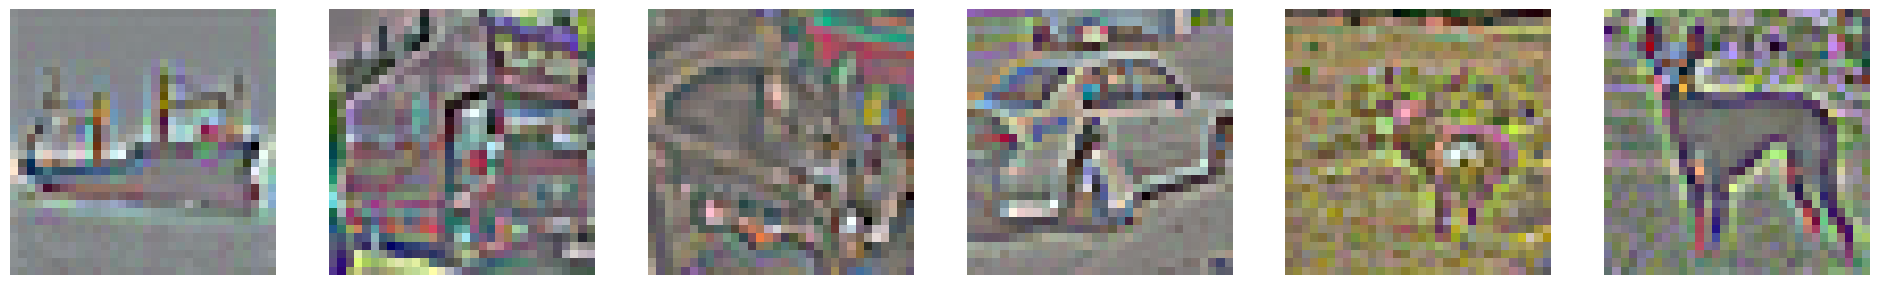

In [51]:
plot_image(train_set)

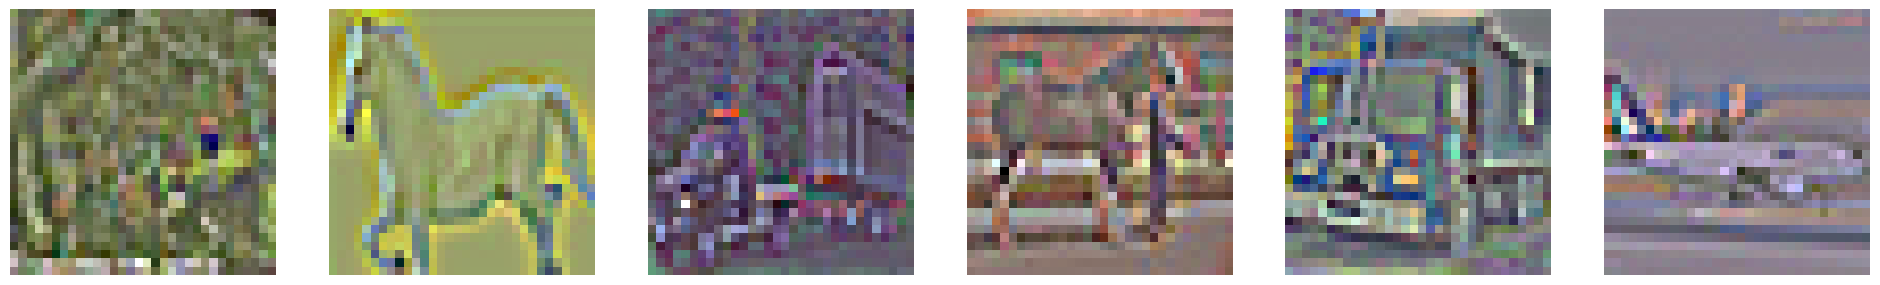

In [52]:
plot_image(test_set)

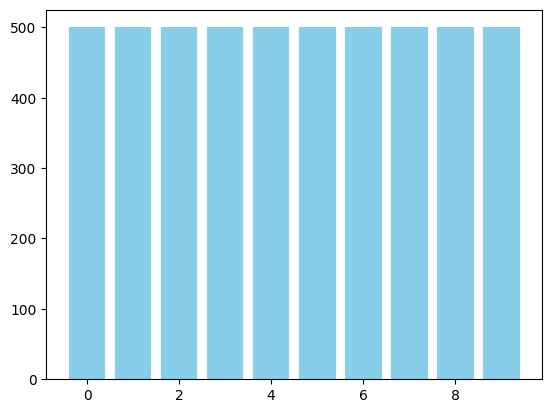

In [53]:
inspect_label(train_label)

In [54]:
SIFT_extractor = SIFT(gs=6, ps=31, sift_thres=.3, gaussian_sigma=0.7,
                       gaussian_thres = 0.4, num_angles=12, num_bins= 5, alpha=9)

In [55]:
sift_features_train = SIFT_extractor.get_sift_featues(train_set)
sift_features_test = SIFT_extractor.get_sift_featues(test_set)

In [56]:
gamma = 0.6
C = 10

In [57]:
chi2 = Chi2Kernel(gamma).kernel
model = Multi_Class_SVM_Classifier_OvO(C=C, kernel= chi2)
model.fit(sift_features_train, train_label)

In [58]:
Y_test_pred = model.predict(sift_features_test)

In [59]:
create_Submissioncsv(Y_test_pred)